# Praca Domowa 6

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Zadania

### Zadanie 1

a) Narysować wykres y=x^3+1 dla x z przedziału [-3, 3]. Dodać wycentrowany tytuł oraz opisy osi.

b) Do tego samego wykresu dodać wybraną inną funkcję i oznaczyć ją linią o innym kolorze i grubości. Dodać legendę.

c) Pokazać wykresy z a) i b) osobno używając funkcji subplot().

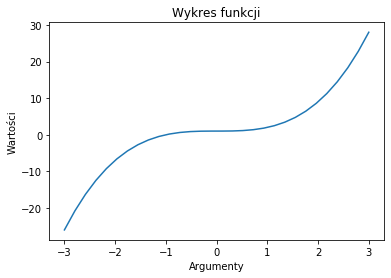

In [2]:
# a)
x = np.linspace(-3, 3, 30)
y = x**3 + 1

plt.plot(x, y)
plt.ylabel('Wartości')
plt.xlabel('Argumenty')
plt.title('Wykres funkcji', loc = 'center')
plt.show()

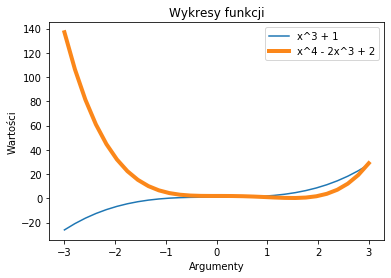

In [3]:
# b)
x = np.linspace(-3, 3, 30)
y = x ** 3 + 1
y_1 = x ** 4 - 2 * x **3 + 2

plt.plot(x, y, label = 'x^3 + 1')
plt.plot(x, y_1, color = "#FB871A", linewidth=4, label = 'x^4 - 2x^3 + 2')

plt.ylabel('Wartości')
plt.xlabel('Argumenty')
plt.title('Wykresy funkcji', loc = 'center')
plt.legend()
plt.show()

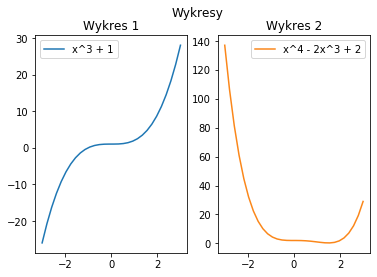

In [4]:
# c)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Wykresy')

ax1.plot(x, y, label = 'x^3 + 1')
ax1.set_title('Wykres 1')
ax1.legend()

ax2.plot(x, y_1, color = "#FB871A", label = 'x^4 - 2x^3 + 2')
ax2.set_title('Wykres 2')
ax2.legend()

plt.show()

# Zadanie 2

a) Narysować wykres słupkowy na podanych danych.

b) Znaleźć sposób (w internecie) na narysowanie wykresu kołowego na podanych danych.
 

In [5]:
labels = ['Blue', 'Red', 'Green', 'Purple']
sizes = [15, 30, 45, 10]

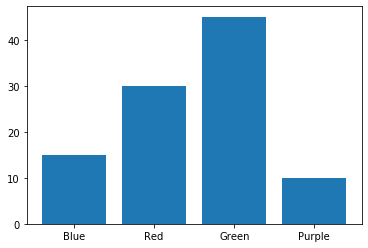

In [6]:
plt.bar(labels, sizes)
plt.show()

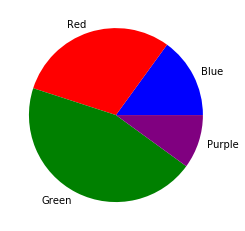

In [7]:
plt.pie(sizes, labels = labels, colors = labels)
plt.show()

# Zadanie 3

Poprawić wykres tak, aby łatwiej było odczytać w którym województwie śmiertelność wzrosła najbardziej.
Jest przynajmniej kilka innych podejść: scatterplot z latami na osi OX/OY, odcinki zaczynające się w danych ze średniej a kończące w 2020.
Jestem też ciekawa Waszych innych pomysłów.

![https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png](https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png)

Źródło: https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png

In [8]:
# Dane

wojewodztwo = ["ZACHODNIOPOMORSKIE", "WIELKOPOLSKIE", "WARMINSKO-MAZURSKIE", "SWIETOKRZYSKIE",  "SLASKIE", "POMORSKIE", "PODLASKIE", "PODKARPACKIE", "OPOLSKIE", "MAZOWIECKIE", "MALOPOLSKIE", "LODZKIE", "LUBUSKIE", "LUBELSKIE", "KUJAWSKO-POMORSKIE", "DOLNOSLASKIE"]

l_2020 = np.array([1874, 4013, 1565, 2008, 6270, 2521, 1468, 2909, 1356, 6564, 4743, 3687, 1313, 2731, 2435, 3665])

l_2015_2019 = np.array([1509, 2796, 1241, 1208, 4255, 1830, 1049, 1643, 881, 4811, 2690, 2578, 894, 1920, 1768, 2683])

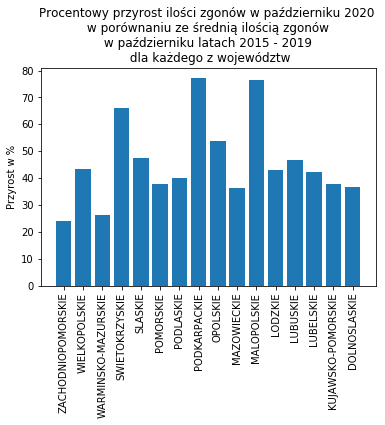

In [9]:
# Pierwsza próba wizualizacji

y = (l_2020 - l_2015_2019) / l_2015_2019 * 100
plt.bar(wojewodztwo, y)
plt.xticks(rotation = 90)
plt.title("Procentowy przyrost ilości zgonów w październiku 2020 \n w porównaniu ze średnią ilością zgonów \n w październiku latach 2015 - 2019 \n dla każdego z województw")
plt.ylabel('Przyrost w %')
plt.show()

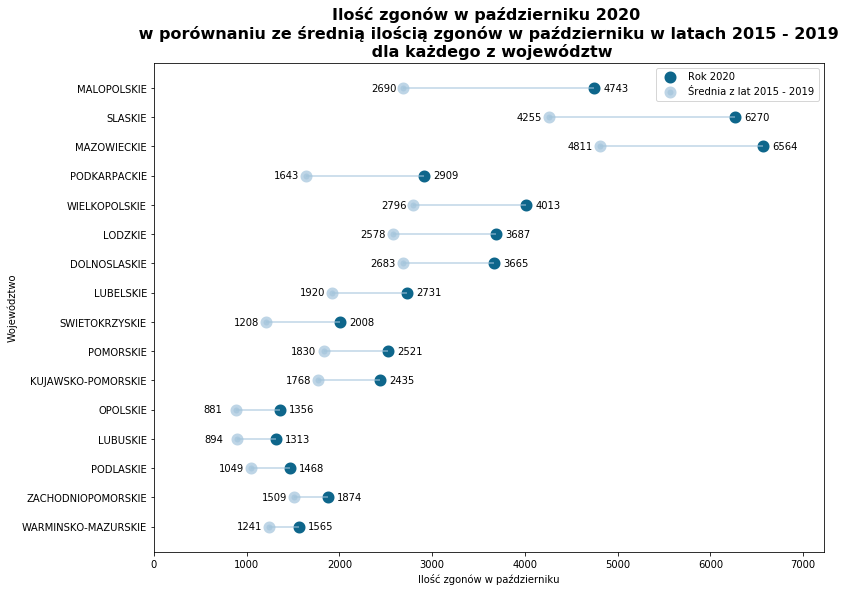

In [10]:
# Druga próba wizualizacji
# Lollipop plot with two groups
# Inspiracja: https://python-graph-gallery.com/184-lollipop-plot-with-2-groups/

plt.rcParams['figure.figsize'] = [12, 9] # ustawienia wielkości wykresu

roznica = abs(l_2020 - l_2015_2019)
df = pd.DataFrame({'wojewodztwo':wojewodztwo, 
                   'rok2020':l_2020 , 
                   'latapoprzednie':l_2015_2019, 
                   'roznica':roznica })

ordered_df = df.sort_values(by = 'roznica') # sortujemy wg. województw, które miały największą zmianę w ilości zgonów
my_range = range(1,len(df.wojewodztwo)+1)

plt.hlines(y=my_range, xmin=ordered_df['latapoprzednie'], 
           xmax=ordered_df['rok2020'], color='#a3c4dc', alpha=0.7)
plt.scatter(ordered_df['rok2020'], my_range, 
            color='#0e668b', alpha=1, label='Rok 2020',
           linewidths = 6)
plt.scatter(ordered_df['latapoprzednie'], my_range, 
            color='#a3c4dc', alpha=0.7 , label='Średnia z lat 2015 - 2019',
           linewidths = 6)
plt.legend()

# Poprawki wizualne
plt.title("Ilość zgonów w październiku 2020 \n w porównaniu ze średnią ilością zgonów w październiku w latach 2015 - 2019 \n dla każdego z województw", 
          loc='center', fontsize = 16, fontweight="bold")
plt.yticks(my_range, ordered_df['wojewodztwo'])

plt.xlabel('Ilość zgonów w październiku') # Wypada nazwać, co prezentujemy :)
plt.ylabel('Województwo')

plt.xlim(0, 1.1 * max(max(df['rok2020']), max(df['latapoprzednie'])))

# I jeszcze podpisanie wartości - żeby możnabyło je dobrze zobaczyć
i = 1
for row in ordered_df.itertuples():
    plt.annotate(str(row.rok2020), (row.rok2020 + 100, i - 0.1))
    plt.annotate(str(row.latapoprzednie), (row.latapoprzednie - 350, i - 0.1))
    i = i + 1

plt.show()

# Zadanie 4

Zrobić własny wykres w stylu xkcd dotyczący wizualzacji danych. Może być bardzo luźno związany.

Jeśli ktoś nie trafił na komiksy xkcd, to polecam przejrzeć zajrzeć na stronę Randalla Munroe: https://xkcd.com/

Tu kilka przykładów, które mogą być inspiracją albo chociaż rozrywką:
- https://xkcd.com/688/
- https://xkcd.com/1597/ - True story jak Wam pokazałam gita :(
- https://xkcd.com/1945/

Matplotlib pozwala na proste tworzenie wykresów w stylu xkcd, służy do tego funkcja `xkcd()` z `matplotlib.pyplot`.
Warto zajrzeć do dokumentacji: https://matplotlib.org/gallery/showcase/xkcd.html
Mój przykład umieściłam poniżej.

Uwaga, w szczególności styl działa też z wykresami kołowymi i słupkowymi.

### Przykład

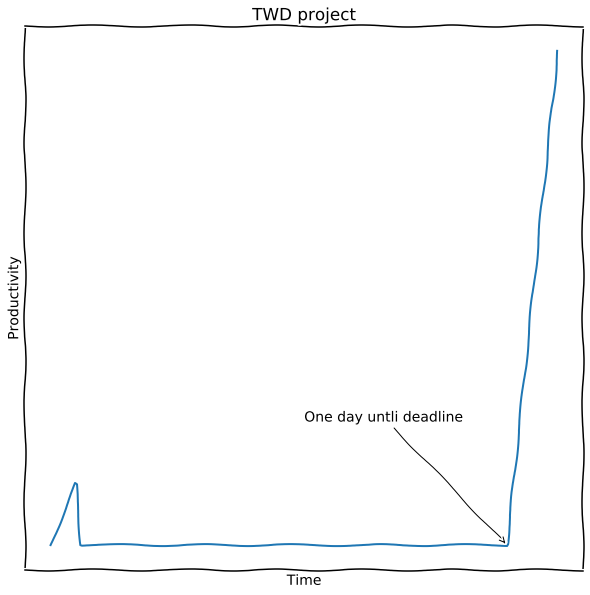

In [13]:
x = [0, 0.05, 0.06, 0.9, 1]
y = [0, 0.5, 0, 0, 4]

# rysowanie w xkcd mode
with plt.xkcd():
    # ustawienie rozmiaru
    plt.figure(figsize=(10,10))
    
    plt.plot(x,y)
    
    # usuniecie podpisow osi
    plt.xticks([])
    plt.yticks([])
    
    # dodanie napisow
    plt.title("TWD project")
    plt.xlabel('Time')
    plt.ylabel('Productivity')

    plt.annotate(
        'One day untli deadline',
        xy=(0.9, 0), arrowprops=dict(arrowstyle='->'), xytext=(0.5, 1))
plt.show()

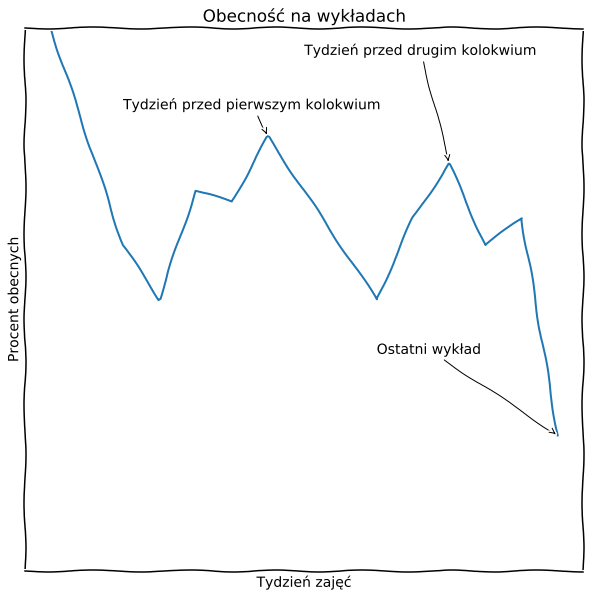

In [12]:
x = range(1,16)
y = [100, 80, 60, 50, 70, 68, 80, 70, 60, 50, 65, 75, 60, 65, 25]

# rysowanie w xkcd mode
with plt.xkcd():
    # ustawienie rozmiaru
    plt.figure(figsize=(10,10))
    
    plt.plot(x,y)
    
    # usuniecie podpisow osi
    plt.xticks([])
    plt.yticks([])
    
    # dodanie napisow
    plt.title("Obecność na wykładach")
    plt.xlabel('Tydzień zajęć')
    plt.ylabel('Procent obecnych')
    
    plt.ylim(0, 100)

    # dodoanie adnotacji
    plt.annotate(
        'Tydzień przed pierwszym kolokwium',
        xy=(7, 80), arrowprops=dict(arrowstyle='->'), xytext=(3, 85))
    plt.annotate(
        'Tydzień przed drugim kolokwium',
        xy=(12, 75), arrowprops=dict(arrowstyle='->'), xytext=(8, 95))
    plt.annotate(
        'Ostatni wykład',
        xy=(15, 25), arrowprops=dict(arrowstyle='->'), xytext=(10, 40))
plt.show()